In [113]:
import pandas as pd #biblioteca para manipulação de dados
import numpy as np #biblioteca para utilizacao de vetores e matrizes
import matplotlib.pyplot as plt #bibloteca para plotar graficos
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab

# 50 Trending topics do tweet

In [106]:
url= 'https://raw.githubusercontent.com/desenvolvedorjairomonassa/carrefourdatachallenge/main/trendtopcis.csv'
df_trends = pd.read_csv(url,sep=';')

In [107]:
df_trends.shape

(50, 2)

In [108]:
df_trends.head()

,name,volumne
0,Daniel Amorim,0
1,#CNNLixo,0
2,#BRUxVAS,0
3,CNN Brasil,11526
4,Michelle Bolsonaro,0


In [109]:
df_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     50 non-null     object
 1   volumne  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [110]:
#filtrar os trends que mostram volumes
df_trends2 = df_trends.loc[df_trends['volumne']>0 ]

In [111]:
#ordenar
df_trends2.sort_values('volumne',ascending=False,)

,name,volumne
35,teen wolf,351261
43,Nenê,63885
44,Carla Diaz,54792
39,Cristina,54052
17,O VAR,41920
42,Alexandre Garcia,37859
10,Suzane,32312
33,O Vasco,22824
27,Liberdade de Opinião,20201
36,GRANDE DIA,16448


In [116]:
#plt.title('Volume trending topics')

TypeError: ignored

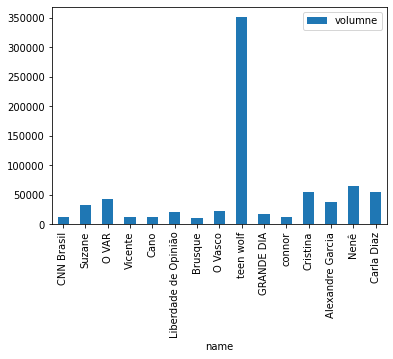

In [117]:
df_trends2.plot(kind='bar',x='name',y='volumne')

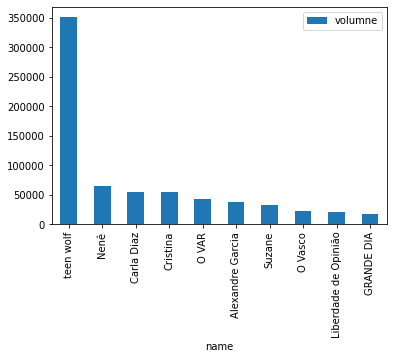

In [118]:
df_trends2.nlargest(10, 'volumne').plot(kind='bar',x='name',y='volumne')

##            # tweets do trending topics de "Alexandre Garcia"

In [119]:
url= 'https://raw.githubusercontent.com/desenvolvedorjairomonassa/carrefourdatachallenge/main/tweets_trend.csv'
df = pd.read_csv(url,sep=';')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    int64  
 1   text              100 non-null    object 
 2   retweet           100 non-null    int64  
 3   coordinates       0 non-null      float64
 4   created_at        100 non-null    object 
 5   location          59 non-null     object 
 6   favourites_count  100 non-null    int64  
 7   followers_count   100 non-null    int64  
 8   friends_count     100 non-null    int64  
 9   statuses_count    100 non-null    int64  
 10  q_retweet_count   100 non-null    int64  
 11  score             100 non-null    float64
 12  sentiment         100 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 10.3+ KB


In [121]:
df['sentiment']= df['sentiment'].astype('category')

In [122]:
df.head(5)

,id,text,retweet,coordinates,created_at,location,favourites_count,followers_count,friends_count,statuses_count,q_retweet_count,score,sentiment
0,0,Dou 24 horas pra Jovem Klan anunciar a contrat...,1010,NaN,Fri Sep 24 22:51:22 +0000 2021,Rio de Janeiro,6966,13886061,713,16583,0,-0.727595,negative
1,1,A CNN desmentiu novamente Alexandre Garcia que...,449,NaN,Fri Sep 24 19:53:43 +0000 2021,Porto Alegre,7269,145634,1963,21236,0,0.000000,neutral
2,2,O jornalista Alexandre Garcia foi demitido da ...,871,NaN,Sat Sep 25 00:45:32 +0000 2021,Brasil,445,48529,1071,12124,0,0.000000,neutral
3,3,Tudo que Alexandre Garcia faz é militância Bol...,0,NaN,Sun Sep 26 02:03:28 +0000 2021,NaN,90,2,82,1849,0,0.000000,neutral
4,4,Parabéns por ter mandado esse lixo propagador ...,0,NaN,Sun Sep 26 02:03:02 +0000 2021,Diadema SP,38,1003,16,53242,0,-0.813857,negative


In [123]:
#eliminando colunas sem importancia
column=['id','text','coordinates']
df.drop(columns=column,inplace=True)

In [124]:
df.head(5)


,retweet,created_at,location,favourites_count,followers_count,friends_count,statuses_count,q_retweet_count,score,sentiment
0,1010,Fri Sep 24 22:51:22 +0000 2021,Rio de Janeiro,6966,13886061,713,16583,0,-0.727595,negative
1,449,Fri Sep 24 19:53:43 +0000 2021,Porto Alegre,7269,145634,1963,21236,0,0.000000,neutral
2,871,Sat Sep 25 00:45:32 +0000 2021,Brasil,445,48529,1071,12124,0,0.000000,neutral
3,0,Sun Sep 26 02:03:28 +0000 2021,NaN,90,2,82,1849,0,0.000000,neutral
4,0,Sun Sep 26 02:03:02 +0000 2021,Diadema SP,38,1003,16,53242,0,-0.813857,negative


In [125]:
df['location'].fillna('Brasil',inplace=True)

In [126]:
df['location'].unique()

array(['Rio de Janeiro', 'Porto Alegre', 'Brasil', 'Diadema SP',
       'São Paulo, Brasil', '-23.547371,-46.633111', 'São Paulo',
       'Brasil- rj', 'ARACAJU', 'Curitiba ', 'SÃO PAULO - SP - BRASIL',
       'jundiai', 'São Paulo - Brazil', 'Ceará, Brasil',
       'Piracicaba, Brasil', 'Es- Brasil ', 'Telêmaco Borba Pr, Brasil',
       'Goiânia, Brasil', 'Rio de Janeiro, Brasil', 'Vitória-ES ',
       'Campo Grande, MS', 'Praia Grande', 'Osasco, Brasil',
       'Sao Luis(MA) ', 'Balneário Camboriú SC',
       'Campos dos Goytacazes, Brasil', 'Magé, Brasil', 'Estados Unidos',
       'Japão', 'Suzano - SP - Brasil', 'Ubatuba', 'Duas Barras, RJ',
       'Brazil', 'Campo Grande, Brasil', 'Taubaté SP',
       'João Pessoa, Brasil'], dtype=object)

In [127]:
df.groupby('sentiment')['retweet'].sum()

sentiment
negative    1017
neutral     1326
positive       0
Name: retweet, dtype: int64

In [128]:
df.groupby(['location'])['retweet'].sum()

location
-23.547371,-46.633111               0
ARACAJU                             0
Balneário Camboriú SC               0
Brasil                            878
Brasil- rj                          0
Brazil                              0
Campo Grande, Brasil                0
Campo Grande, MS                    0
Campos dos Goytacazes, Brasil       0
Ceará, Brasil                       0
Curitiba                            0
Diadema SP                          0
Duas Barras, RJ                     0
Es- Brasil                          0
Estados Unidos                      0
Goiânia, Brasil                     0
Japão                               0
João Pessoa, Brasil                 0
Magé, Brasil                        0
Osasco, Brasil                      0
Piracicaba, Brasil                  0
Porto Alegre                      449
Praia Grande                        0
Rio de Janeiro                   1010
Rio de Janeiro, Brasil              0
Sao Luis(MA)                        0
Suz

In [129]:
df.loc[df['location'] == '-23.547371,-46.633111',['location']] = 'São Paulo'

In [130]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [131]:
df.groupby('location')['retweet'].sum()

location
ARACAJU                             0
Balneário Camboriú SC               0
Brasil                            878
Brasil- rj                          0
Brazil                              0
Campo Grande, Brasil                0
Campo Grande, MS                    0
Campos dos Goytacazes, Brasil       0
Ceará, Brasil                       0
Curitiba                            0
Diadema SP                          0
Duas Barras, RJ                     0
Es- Brasil                          0
Estados Unidos                      0
Goiânia, Brasil                     0
Japão                               0
João Pessoa, Brasil                 0
Magé, Brasil                        0
Osasco, Brasil                      0
Piracicaba, Brasil                  0
Porto Alegre                      449
Praia Grande                        0
Rio de Janeiro                   1010
Rio de Janeiro, Brasil              0
Sao Luis(MA)                        0
Suzano - SP - Brasil                0
SÃO

In [132]:
df_loca =  df.groupby('location')['retweet'].sum()

In [133]:
df_loca = pd.DataFrame(df_loca)


In [134]:
maiores=df_loca.loc[df_loca['retweet'] >0].nlargest(10,'retweet')
print(maiores)

                   retweet
location                  
Rio de Janeiro        1010
Brasil                 878
Porto Alegre           449
Taubaté SP               3
São Paulo, Brasil        2
Ubatuba                  1


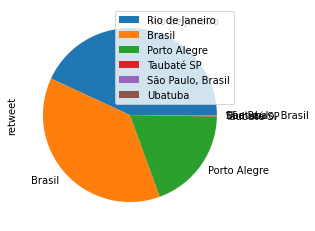

In [135]:
plt.title = 'Localização x numero retweet'
maiores.plot(kind='pie',y='retweet')


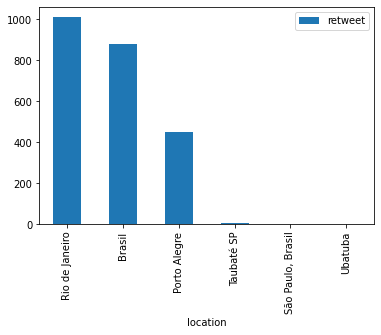

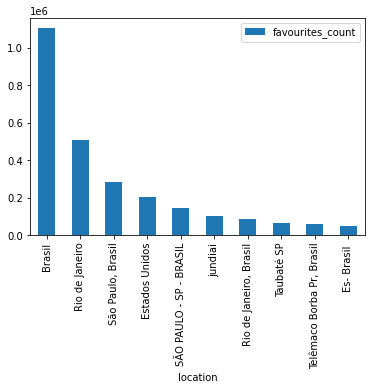

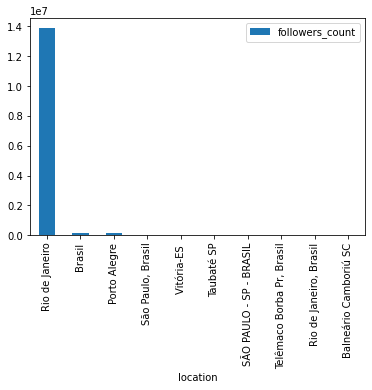

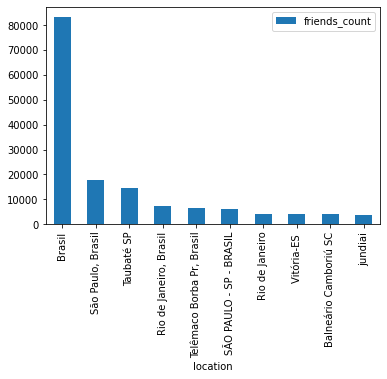

In [136]:
colunas_agrupar = ['retweet','favourites_count','followers_count','friends_count']
def agrupar_graficos(coluna):
  df_loca =  df.groupby('location')[coluna].sum()
  df_loca = pd.DataFrame(df_loca)
  maiores=df_loca.loc[df_loca[coluna] >0].nlargest(10,coluna)
  plt.title = 'Localização x '+coluna
  maiores.plot(kind='bar',y=coluna)

for coluna in colunas_agrupar:
  agrupar_graficos(coluna)

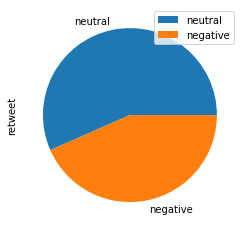

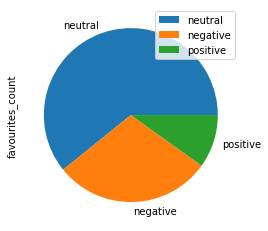

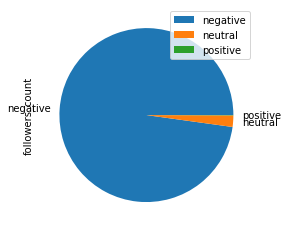

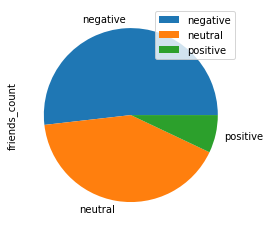

In [137]:
colunas_agrupar = ['retweet','favourites_count','followers_count','friends_count']
def agrupar_graficos(coluna):
  df_loca =  df.groupby('sentiment')[coluna].sum()
  df_loca = pd.DataFrame(df_loca)
  maiores=df_loca.loc[df_loca[coluna] >0].nlargest(10,coluna)
  plt.title = 'Sentimentos x '+coluna
  maiores.plot(kind='pie',y=coluna)

for coluna in colunas_agrupar:
  agrupar_graficos(coluna)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   retweet           100 non-null    int64              
 1   created_at        100 non-null    datetime64[ns, UTC]
 2   location          100 non-null    object             
 3   favourites_count  100 non-null    int64              
 4   followers_count   100 non-null    int64              
 5   friends_count     100 non-null    int64              
 6   statuses_count    100 non-null    int64              
 7   q_retweet_count   100 non-null    int64              
 8   score             100 non-null    float64            
 9   sentiment         100 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(6), object(1)
memory usage: 7.4+ KB


In [139]:
#analisar todos os dados numericos
#!pip install -U pandas-profiling[notebook]
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     - 34.6 MB 756 kB/s
     |████████████████████████████████| 10.1 MB 67 kB/s 
     |████████████████████████████████| 636 kB 39.6 MB/s 
     |████████████████████████████████| 102 kB 37.7 MB/s 
     |████████████████████████████████| 675 kB 50.9 MB/s 
     |████████████████████████████████| 3.1 MB 44.5 MB/s 
     |████████████████████████████████| 62 kB 849 kB/s 
     |████████████████████████████████| 812 kB 63.6 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=4d420d551041ce7489f92c75e2d702a5acec7c8bc53c4c86a4b35fc4c9a39cf3
  Stored in directory: /tmp/pip-ephem-wheel-cache-noybnzai/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=88fcf170df34ff3f3dede377cdd7b2e30cf338ebdcf30b56315fa6a1e3abd9a7
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d2

In [140]:
from pandas_profiling import ProfileReport


In [141]:
df.isnull().sum()

retweet             0
created_at          0
location            0
favourites_count    0
followers_count     0
friends_count       0
statuses_count      0
q_retweet_count     0
score               0
sentiment           0
dtype: int64

In [142]:
df['sentiment'].unique()

['negative', 'neutral', 'positive']
Categories (3, object): ['negative', 'neutral', 'positive']

In [143]:
df2=df.drop(columns='location')


In [144]:
df3 = pd.get_dummies(df2, dummy_na=True)


In [145]:
df3.head()

,retweet,created_at,favourites_count,followers_count,friends_count,statuses_count,q_retweet_count,score,sentiment_negative,sentiment_neutral,sentiment_positive,sentiment_nan
0,1010,2021-09-24 22:51:22+00:00,6966,13886061,713,16583,0,-0.727595,1,0,0,0
1,449,2021-09-24 19:53:43+00:00,7269,145634,1963,21236,0,0.000000,0,1,0,0
2,871,2021-09-25 00:45:32+00:00,445,48529,1071,12124,0,0.000000,0,1,0,0
3,0,2021-09-26 02:03:28+00:00,90,2,82,1849,0,0.000000,0,1,0,0
4,0,2021-09-26 02:03:02+00:00,38,1003,16,53242,0,-0.813857,1,0,0,0


In [146]:
df3.loc[df3['sentiment_nan'] == 1]
df3.drop(columns='sentiment_nan',inplace=True)

In [147]:
df3.drop(columns='created_at',inplace=True)

In [148]:
df3.describe()

,retweet,favourites_count,followers_count,friends_count,statuses_count,q_retweet_count,score,sentiment_negative,sentiment_neutral,sentiment_positive
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,23.430000,28981.330000,1.429506e+05,1708.360000,28410.670000,159.440000,-0.115338,0.340000,0.500000,0.160000
std,139.460306,44866.183393,1.388284e+06,3241.390017,49939.150006,780.426772,0.554699,0.476095,0.502519,0.368453
min,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,-0.978697,0.000000,0.000000,0.000000
25%,0.000000,409.250000,8.750000e+01,217.750000,1497.750000,0.000000,-0.623804,0.000000,0.000000,0.000000
50%,0.000000,6889.000000,2.725000e+02,472.000000,6725.000000,0.000000,0.000000,0.000000,0.500000,0.000000
75%,0.000000,35253.750000,1.112750e+03,1287.750000,26793.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1010.000000,201200.000000,1.388606e+07,20440.000000,299700.000000,6344.000000,0.987673,1.000000,1.000000,1.000000


In [149]:
profile = ProfileReport(df3)

In [150]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [151]:
profile.to_file('tweet_historico.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]